In [82]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.optimize import minimize

## Dataset

In [112]:
s = """
# 0       1       2         | 3          4
# Current Voltage Vibration | Error rate Faulty
  0.25    19.2    51.2        0.0002     -1
  0.35    15.1    10.2        0.0010     -1
  0.63    18.2    312.1       3.1260     1
  0.69    11.2    315.7       5.9231     1
  0.39    12.8    244.7       6.3123     1
  0.47    15.9    92.7        0.0021     -1  
"""

D = np.genfromtxt(str.encode(s).splitlines())

In [130]:
d={}
d['x']=D[:,2]
d['y']=D[:,4]

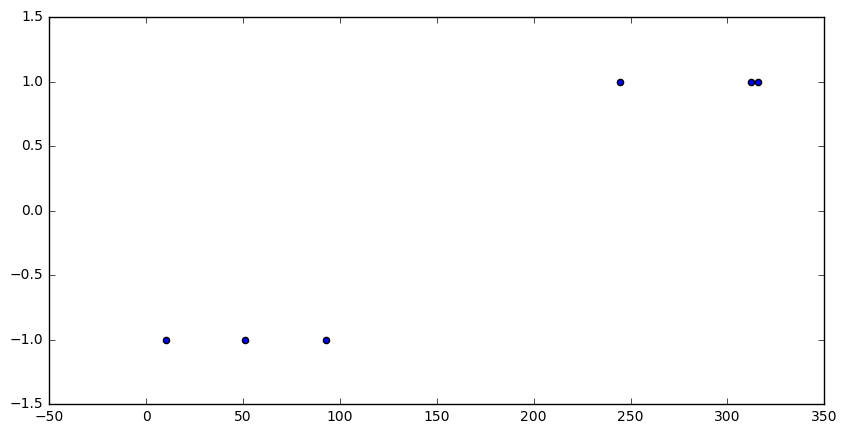

In [131]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])

## Model

In [132]:
def sig(x): return 1/(1+np.exp(-x))

In [133]:
def a(x): return 2/np.pi * np.arctan(x) # range -1 ==> 1

In [134]:
def f(x,w): return a(w[0] + x*w[1])

In [135]:
def dist(a,b):
    return np.max([0, -a*b])

In [136]:
def loss(w,d):
    loss = 0
    for i in range(len(d['x'])):
        x = d['x'][i]
        y = d['y'][i]
        loss += dist(f(x,w),y)
    return loss

In [137]:
loss([0,-1],d)

2.9933420663109698

In [138]:
def F(w): return loss(w,d)

## Minimize the Loss using Numerical Optimization

In [166]:
M=minimize(F,[-0.5,0.5])

In [167]:
w_hat=M.x
print("Optimal Parameter:", w_hat)
print("Minimal Loss:", F(w_hat))

Optimal Parameter: [-0.53996724  0.00407572]
Minimal Loss: 0.0


## Visualize Loss Function

In [168]:
# def F(w): return (w[1]-0.2)**2 

In [169]:
xlim = (-20,20,300)
ylim = (-.1,.1,300)
X = np.linspace(*xlim)
Y = np.linspace(*ylim)
Z = np.array([[ F([x,y]) for x in X] for y in Y ])

def rescale(Z):
    z_min = np.percentile(Z,0)
    z_max = np.percentile(Z,80)
    z_range = z_max - z_min
    Z_scaled = (Z-z_min)/z_range
    Z_scaled[Z_scaled > 1] = 1
    return Z_scaled

Z_scaled = rescale(Z)

# left right bottom top
extent = (xlim[0],xlim[1],ylim[1],ylim[0])
x_range = xlim[1]-xlim[0]
y_range = ylim[1]-ylim[0]
aspect = x_range/y_range/2

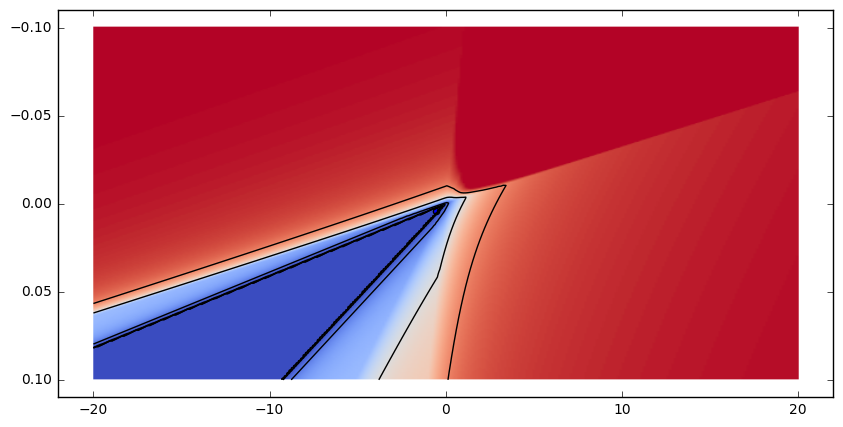

In [170]:
plt.figure(figsize=(10,10))
plt.imshow(Z,cmap=cm.coolwarm,vmin=np.min(Z),vmax=np.percentile(Z,80), extent=extent, aspect=aspect)
plt.contour(X,Y,Z_scaled,[0.0001, 0.001, 0.01, 0.1,0.5,0.8,1],colors="black")
plt.scatter(*w_hat)

## Optimal Model

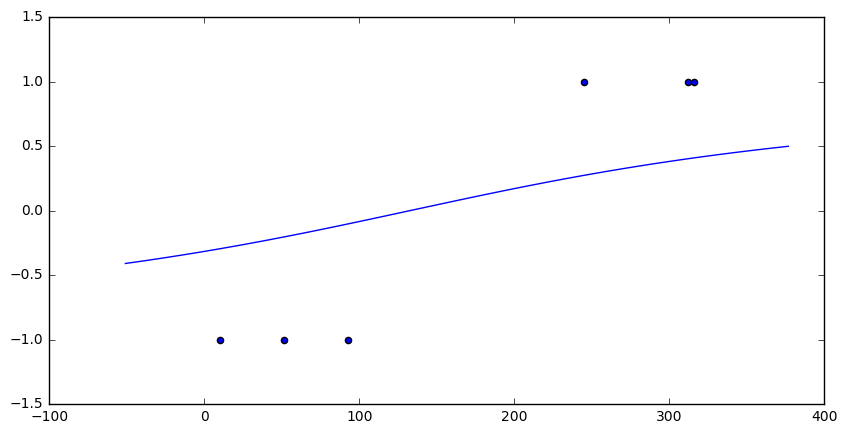

In [171]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])
r = np.max(d['x']) - np.min(d['x'])
X = np.linspace(np.min(d['x'])-0.2*r,np.max(d['x'])+0.2*r,100)
Y = [f(x,w_hat) for x in X]
plt.plot(X,Y)